# Entangled states
---

## Product and entangled states

### Product states

Sejam,

$$ |a\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |b\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix}.$$

Então o produto $ |ba\rangle $ é

$$ |ba\rangle = \begin{bmatrix} b_0a_0 \\ b_0a_1 \\ b_1a_0 \\ b_1a_1 \end{bmatrix}.$$

- Essas regras seguem a probabilidade padrão.
- Para calcular a probabilidade do bit mais a direita devemos seguir os seguintes passos:
\begin{matrix}
    p_{|a\rangle}(|0\rangle) &=& p(|00\rangle) + p(|10\rangle) \\
    &=& (b_0a_0)^2 + (b_1a_0)^2 \\
    &=& b_0^2 a_0^2 + b_1^2 a_0^2 \\
    &=& (b_0^2 + b_1^2)\cdot a_0^2 \\
    &=& a_0^2
\end{matrix}

### Entangled states

- Estados emaranhados são aqueles onde não há pares de qubit únicos $|a\rangle$ e $|b\rangle$ que formem o produto.
- Exemplo:
    - $$ |\Phi^+\rangle = \dfrac{1}{\sqrt{2}} \cdot \begin{bmatrix} 1 \\ 0\\ 0\\ 1 \end{bmatrix} = \dfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

---
## Entangling gates

- Para criar emaranhamento, precisamos de portas multi-qubit.

### The cx gate

Para começar vamos criar um estado $|00\rangle$.

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'
ket = Statevector(qc)

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
ket.draw('latex')

<IPython.core.display.Latex object>

Essa porta atua em dois qubit, conhecidos como controle e alvo.
Vamos tentar usar o qubit 0 como controle e o 1 como alvo, para isso:

In [3]:
qc.cx(0,1)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

A porta não teve efeito, o estado permanece o mesmo.
Vamos inverter o alvo com o controle.

In [4]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

Ainda sem efeito. Isso era o esperado. Se o controle está no estado $|0\rangle$ a porta `cx` não faz nada. Caso o controle seja $|1\rangle$, `cx` insere uma porta `x` no alvo.

<p align="center">
    <img src="https://learn.qiskit.org/content/intro/images/multi-qubit/cnot.svg" />
</p>

<div align="center", style=font-size:12px>
Fonte:
<a href="https://learn.qiskit.org/content/intro/images/what-is/amp-vs-prob.svg">
Qiskit
</a>
</div>

Então, se quisermos que `cx` funcione, precisamos inverter o qubit de controle para $|1\rangle$.

In [5]:
qc.x(1,0)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

Agora ao executar `cx` também inverterá o qubit alvo.

In [6]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

Ainda não possuímos um emaranhamento. Para isso precisamos que o qubit de controle esteja em um estado de superposição, como $|\!+\!0\rangle$.

In [7]:
# Let's create a fresh quantum circuit
qc = QuantumCircuit(2)

qc.h(1)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

Se aplicarmos `cx` agora, atuará em paralelo nos dois estados, $|00\rangle$ e $|10\rangle$.

In [8]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

O resultado é $|\Phi^+\rangle$, um estado emaranhado.

### The cz gate

Seu efeito é semelhante ao `cx`, atuando em um qubit alvo e outro de controle, não fazendo nada quando o qubit de controle está no estado $|0\rangle$. Mas quando o qubit de controle está em $|1\rangle$, executa um `z` no alvo.

Essa é a interpretação padrão. A porta `z` aplicado a somente um qubit não faz nada para $|0\rangle$, mas fornece uma fase de $-1$ para o estado $|1\rangle$. Então, a porta `cz` só tem efeito quando ambos os qubits estão no estado $|1\rangle$.

### The cx gate revisited

Outras interpretações são possíveis para essa porta. Por exemplo, no caso em ambos os qubits estão no estado $|+\rangle$.

In [9]:
qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

Descobriremos que `cx` não tem efeito, não importa em qual direção.

In [10]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

Agora, vamos inverter o qubit alvo para $|-\rangle$.

In [11]:
qc.z(0)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

Ao aplicarmos `cx` agora, teremos um efeito. Ele vira o qubit de controle para $|-\rangle$ também.

In [12]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

Esse efeito é conhecido como retrocesso de fase, quando há uma superposição nos qubits de controle e de destino, alguns recursos da superposição de destino podem realimentar o controle.

Também pode nos fornecer uma versão alternativa da porta `cx`. Podemos pensar nisso como aplicar um `z` ao controle se o alvo estiver no estado $|-\rangle$ e não fazer nada caso esteja em $|+\rangle$.

---

## Entangled states and simulation

Para descrever completamento o estado de $n$ qubits, temos que ser capazes de acompanhar $2^n$ amplitudes. Um laptop moderno pode controlar tranquilamente $2^{20}$ amplitudes, mas para $2^{100}$ amplitudes mesmo supercomputadores teriam dificuldade.

Mas há uma forma mais inteligente de fazer isso. Suponha que comecemos de um estado de produto, logo cada qubit pode ser descrito independentemente por um único estado de qubit com duas amplitudes.

Suponha que executemos um circuito com apenas portas de qubit simples. Essas manipulações podem ser facilmente descritas modificando os estados de qubit único, o que significa fazer alterações nos pares específicos de amplitudes afetadas. Então, para cada qubit medido, a probabilidade é determinada por suas respectivas amplitudes.

Durante todo processo, os estados permaneceram como estados produtos, ou seja, nunca houve um $n$-qubit verdadeiro, mas sim $n$ cálculos separados de qubit único. Isso torna possível acompanhar de forma gerenciável 2$n$ amplitudes. Nesses casos, é possível simular milhares de qubits de forma fácil até mesmo para celulares.

Algoritmos quânticos úteis precisam ser capazes de fazer coisas que os computadores clássicos não possam simular, ou seja, devem evitar funcionar de forma que truques como esse sejam possíveis. Devem usar estados para os quais $2^n$ amplitudes sejam necessárias, envolvendo mais do que os estados do produto. Logo, como qualquer coisa que não seja um produto de estado é um estado emaranhado, o emaranhamento é essencial para qualquer vantagem quântica.

---

## Qubits working together: Superdense coding

Para a comunicação clássica, há um limite para a quantidade de informações que podemos enviar com um certo número de bits. Não podemos enviar mais do que $n$ bits de informação quando enviamos $n$ bits. Para a comunicação quântica essa mesma regra se aplica. Mas existem maneiras de ultrapassar os limites para fazer coisas não são possíveis da forma clássica, usando emaranhamento. Veremos um exemplo no qual a transferência de um qubit permite o envio de uma mensagem com dois bits.

Suponha que Alice deseja enviar uma mensagem de dois bits para Bob, através do envio de qubits.

A maneira mais simples pe usando dois qubits. Simplesmente usando os qubits para codificarem os valores dos bits, aplicando um `x` quando necessário.

In [13]:
# The message
MESSAGE = '00'

# Alice encodes the message
qc_alice = QuantumCircuit(2, 2)
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

Depois de enviar os qubits para Bob, tudo o que ele precisa fazer é medi-los.

In [14]:
from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

# Bob measures
qc_bob = QuantumCircuit(2,2)
qc_bob.measure([0,1],[0,1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

Bob vai obter o mesmo resultado que Alice colocou.

Esse protocolo não usou emaranhamento. Uma forma de inseri-lo seria Alice adicionar as portas `h` e `cx` após codificar as informações. Como segue.

In [15]:
MESSAGE = '00'

qc_alice = QuantumCircuit(2,2)

# Alice encodes the message
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

# then she creates entangled states
qc_alice.h(1)
qc_alice.cx(1,0)

ket = Statevector(qc_alice)
ket.draw('latex')

<IPython.core.display.Latex object>

Para a mensagem $00$, o estado criado por essas portas é $|\Phi^+\rangle$. Para as outras combinações de mensagem obtemos outros estados emaranhados famosos.

\begin{matrix}
00 \to |\Phi^+\rangle &=& \dfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \\
01 \to |\Psi^+\rangle &=& \dfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle) \\
10 \to |\Phi^-\rangle &=& \dfrac{1}{\sqrt{2}}(|00\rangle - |11\rangle) \\
11 \to |\Psi^-\rangle &=& \dfrac{1}{\sqrt{2}}(|01\rangle - |10\rangle) \\
\end{matrix}

- Qiskit mostra outra tabela de estados emaranhados. $11 \to |\Psi^+\rangle$.

Quando Bob recebe esses estados, ele precisa desemaranhá-los, desfazendo as portas `h` e `cx`. Para então recuperar a mensagem.

In [16]:
qc_bob = QuantumCircuit(2,2)
# Bob unentangles
qc_bob.cx(0,1)
qc_bob.h(0)
# Then measures
qc_bob.measure([0,1],[0,1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

Agora usamos estados emaranhados, mas não deram alguma vantagem. Para isso, precisamos examinar a relação entre esses estados emaranhados.

O estado $|\Phi^+\rangle$ é uma superposição de $|00\rangle$ e $|11\rangle$, enquanto $|\Psi^+$ é de $|01\rangle$ e $|10\rangle$. Logo, uma porta `x`é suficiente para transformar um em outro. O mesmo ocorre para $|\Phi^-\rangle$ e $|\Psi^-\rangle$. Da mesma forma, a diferença entre $|\Phi^+\rangle$ e $|\Phi^-\rangle$ é somente a fase relativa, a qual pode ser alterada por uma porta `z` em qualquer qubit, o mesmo ocorre para $|\Psi^+\rangle$ e $|\Psi^-\rangle$.

Alice poderia enviar sua mensagem criando primeiro um estado emaranhado e alterá-lo com portas `x` e `z` para codificar a mensagem correta.

In [17]:
MESSAGE = '00'

qc_alice = QuantumCircuit(2,2)
qc_alice.h(1)
qc_alice.cx(1,0)

if MESSAGE[-2]=='1':
    qc_alice.x(1)
if MESSAGE[-1]=='1':
    qc_alice.z(1)

ket = Statevector(qc_alice)
ket.draw('latex')

<IPython.core.display.Latex object>

Como Bob está recebendo os mesmo estados de antes, ele não precisa alterar seu circuito.

In [18]:
backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

As portas `x` e `z` podem ser aplicadas a apenas um qubit (qubit 1 nesse caso). Alice poderia enviar o qubit 0 assim que tivesse criado o par emaranhado. Na verdade, ela poderia enviá-lo antes de saber a mensagem que deseja enviar.

Isso fica ainda mais impressionante quando imaginamos uma terceira pessoa, que apenas cria $|\Phi^+\rangle$ estados e envia os qubits.

In [19]:
qc_charlie = QuantumCircuit(2,2)

qc_charlie.h(1)
qc_charlie.cx(1,0);

Esse terceiro pode enviar diretamente um qubit para Bob e o outro para Alice. Alice pode codificar a mensagem de dois qubit manipulando apenas o qubit que recebeu e enviá-lo para Bob.

<p align="center">
    <img src="https://learn.qiskit.org/content/intro/images/multi-qubit/superdense.jpg" />
</p>

<div align="center", style=font-size:12px>
Fonte:
<a href="https://learn.qiskit.org/content/intro/images/multi-qubit/superdense.jpg">
Qiskit
</a>
</div>

In [20]:
MESSAGE = '01'

qc_alice = QuantumCircuit(2,2)

if MESSAGE[-2]=='1':
    qc_alice.x(1)
if MESSAGE[-1]=='1':
    qc_alice.z(1)

Agora Bob pode aplicar o mesmo processo anterior e extrair a mensagem.

In [21]:
complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
backend.run(complete_qc).result().get_counts()

{'01': 1024}

O resultado final é que Alice enviou dois bits de informação para Bob, mas só precisou enviar um qubit para isso. Foi possível pois o qubit era parte de um par emaranhado. Enquanto Alice aplicava portas a um qubit, ela estava manipulando o conjunto maior de quatro pares emaranhados do qual fazia parte.

---

## Unique correlations: The Hardy paradox

### Some classical correlations

Agora vamos considerar outra situação com nossos amigos Alice, Bob e Charlie. Primeiro, vamos considerar um caso completamente clássico.

Suponha que Charlie empacote um par de formas coloridas todos os dias, enviando uma para Alice e a outra para Bob. Todos os dias, Alice e Bob olham para sua forma e comparam o que receberam. Para cada forma, eles olham para uma de duas propriedades: se era um cubo ou não, e se era azul ou não.

Depois de muitos dias, e muitas opções de olhar para a forma ou cor, eles fazem duas observações

Eles nunca são um cubo.
Se um não for azul, o outro será um cubo.
Claramente, Charlie não está apenas enviando formas aleatórias. Existe algum grau de correlação entre os objetos que Charlie escolhe enviar.

Com essas observações em mente, Alice e Bob imaginam o caso de ambos olharem para a cor e descobrirem que sua forma não é azul. Bob seria então capaz de aplicar a observação 2 e inferir que a forma de Alice é certamente um cubo. Alice poderia fazer o mesmo e inferir que a forma de Bob é um cubo. No entanto, pela observação 1, eles sabem que isso é impossível. Então, eles concluem que uma de suas formas sempre será azul.

Este é um cenário bastante artificial, mas mostra que há limites para o tipo de correlações possíveis com sistemas clássicos (como formas coloridas). O fato de que a cor e a forma de cada objeto são simultaneamente bem definidas, podemos aplicar cadeias de lógica como as acima, que usam os resultados de um para deduzir coisas sobre o outro.

Para qubits, entretanto, os resultados de uma medição não são bem definidos antes que a medição seja feita. Então, podemos encontrar diferentes tipos de comportamento?

### Measuring a qubit

No cenário acima, vimos duas propriedades diferentes de um objeto clássico: forma e cor. Para uma contraparte quântica, precisaremos fazer o mesmo com os qubits.

A única informação que extraímos de um qubit é através da medição: aplicamos a operação de medição e obtemos 0 ou 1. A maneira como isso é fisicamente implementado em um computador quântico depende dos detalhes de como seu qubit é construído. Para alguns tipos de qubit, é possível girar o dispositivo de medição para fazer diferentes tipos de medição e ver um comportamento diferente a partir dos resultados.

Para outros tipos de qubit, girar seu dispositivo de medição irá apenas quebrá-lo. No entanto, existe uma maneira simples de obter o mesmo efeito: em vez disso, basta girar o qubit! Executando portas de qubit simples antes de fazer uma medição padrão, reproduzimos os efeitos dessas formas alternativas de medição.

O exemplo mais comum disso é simplesmente executar uma porta `h` imediatamente antes da medição. Isso nos dá o que é conhecido como medição `x`.

In [22]:
meas_x = QuantumCircuit(1,1)
meas_x.h(0)
meas_x.measure(0,0)

meas_x.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

A forma padrão de medição, que é feita apenas com uma porta `measure`, é conhecida como medição `z` neste contexto.

In [23]:
meas_z = QuantumCircuit(1,1)
meas_z.measure(0,0)

meas_z.draw()

┌─┐
q_0: ┤M├
     └╥┘
c: 1/═╩═
      0

Como você pode adivinhar pelos nomes, também existe algo chamado medição `y`, mas não precisaremos usar isso aqui.

Agora vamos ver o que acontece com certos estados quando fazemos essas medições. Começaremos com o estado $|0\rangle$.

In [24]:
qc = QuantumCircuit(1,1)

qc.draw()


q_0: 
     
c: 1/

Para medição padrão, o resultado é certo para a saída 0.

In [26]:
print('Results from z measurement:',
      backend.run(qc.compose(meas_z)).result().get_counts())

Results from z measurement: {'0': 1024}


Para uma medição `x`, entretanto, obteremos resultados completamente aleatórios.

In [27]:
print('Results from x measurement:',
      backend.run(qc.compose(meas_x)).result().get_counts())

Results from x measurement: {'0': 499, '1': 525}


Algo semelhante ocorre para o estado $|1\rangle$.

In [28]:
qc = QuantumCircuit(1,1)
qc.x(0)

qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘
c: 1/═════

A medida `z` produz o resultado esperado com certeza, mas a medida `x` dá resultados aleatórios.

In [29]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
          backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 1024}
Results from x measurement: {'0': 492, '1': 532}


O contrário ocorre para o estado $|+\rangle$.

In [30]:
qc = QuantumCircuit(1,1)
qc.h(0)

qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
c: 1/═════

Embora os resultados sejam aleatórios para uma medição `z`, eles produzem 0 com certeza para uma medição `x`.

In [31]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
          backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 541, '0': 483}
Results from x measurement: {'0': 1024}


Para o estado $|-\rangle$, o resultado seria aleatório para a medição `z` e 1 para a medição `x`.

Para outros estados, podemos encontrar um meio-termo. Por exemplo, podemos experimentar diferentes ângulos de rotação `ry`.
   - O que é rotação `ry`?

In [32]:
from math import pi

qc = QuantumCircuit(1, 1)
qc.ry(-pi/4, 0);

Para o ângulo $-\pi/4$, vemos que ambos os resultados são parcialmente aleatórios, mas não completamente.

In [33]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
          backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 167, '0': 857}
Results from x measurement: {'0': 169, '1': 855}


### The uncertainty principle

Todos esses resultados são consequência do princípio da incerteza descoberto por Werner Heisenberg, que é um dos aspectos mais importantes da mecânica quântica. Afirma que, para certos pares de atributos de um sistema quântico, é impossível saber ambos com certeza.

Isso não é verdade para a cor e a forma de um objeto, como em nosso exemplo anterior. Como sabemos pela experiência cotidiana, saber exatamente qual é a forma de algo não faz com que sua cor se torne aleatória.

É verdade, no entanto, para os resultados das medições `z` e `x`. Essas são duas maneiras diferentes que podemos escolher para codificar um pouco de informação em um qubit. Podemos fazer isso da maneira normal, usando os estados $|0\rangle$ e $|1\rangle$ para codificar os valores de bit 0 e 1, e a utilização da medição de `z` para lê-lo. Ou podemos fazer de uma forma alternativa, usando os estados $|+\rangle$ e $|-\rangle$ para codificar os valores dos bits e a medição `x` para leitura. Mas o princípio da incerteza garante que não possamos fazer as duas coisas ao mesmo tempo.

Para a medida `z` podemos definir uma quantidade

$$ \langle Z \rangle = p_z(0) - p_z(1) $$

- $p_z(0)$ é a probabilidade do resultado 0.
- $p_z(1)$ é a probabilidade do resultado 1.
- Atinge o valor máximo de 1 quando certamente produzirá 0.
- Atinge o valor mínimo de -1 quando certamente produzirá 1.
- Em casos em que o resultado é certo: $\langle Z \rangle^2 = 1$.
- Para resultados aleatórios: $ \langle Z \rangle = \langle Z \rangle^2 = 0 $.

De forma semelhante podemos definir a quantidade $ \langle X \rangle $ para o resultado das medições `x`. Para qualquer vetor de estado válido:

$$ \langle Z \rangle^2 + \langle X \rangle^2 \le 1 $$.

Este é o princípio da incerteza para um qubit, especificamente quanta certeza pode ser compartilhada entre esses tipos de medição.

---

## Unique quantum correlations

Com as noções dessas diferentes bases de medição, podemos começar a olhar para correlações únicas que são possíveis para qubits.

Por exemplo, consideremos novamente nossos amigos Alice, Bob e Charlie. Charlie cria um determinado estado emaranhado e envia um qubit para Alice e o outro para Bob. Eles fazem medições e comparam os resultados. Então Charlie envia outro estado preparado de forma idêntica. Isso se repete muitas vezes, então Alice e Bob podem construir estatísticas sobre todos os resultados de medição diferentes

Vamos considerar o caso em que Charlie envia o seguinte estado emaranhado.

In [34]:
qc_charlie = QuantumCircuit(2,2)
qc_charlie.ry(1.911,1)
qc_charlie.cx(1,0)
qc_charlie.ry(0.785,0)
qc_charlie.cx(1,0)
qc_charlie.ry(2.356,0)

qc_charlie.draw()

┌───┐┌───────────┐┌───┐┌───────────┐
q_0: ─────────────┤ X ├┤ Ry(0.785) ├┤ X ├┤ Ry(2.356) ├
     ┌───────────┐└─┬─┘└───────────┘└─┬─┘└───────────┘
q_1: ┤ Ry(1.911) ├──■─────────────────■───────────────
     └───────────┘                                    
c: 2/═════════════════════════════════════════════════

Primeiro, Alice e Bob tentam fazer medições `z` de seus qubits.

In [35]:
meas_zz = QuantumCircuit(2,2)
meas_zz.measure([0,1],[0,1]);

Em muitas amostras, eles encontram os seguintes resultados.

Results for z measurements:


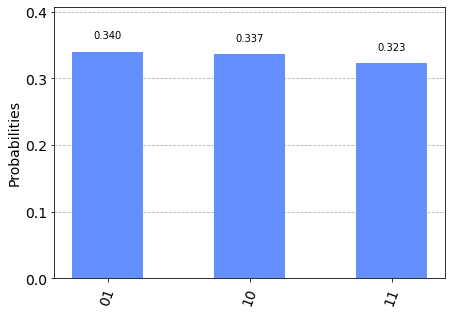

In [37]:
from qiskit.visualization import plot_histogram

print('Results for z measurements:')
counts = backend.run(qc_charlie.compose(meas_zz)).result().get_counts()
plot_histogram(counts)

A partir disso, eles fazem a observação de que os qubits nunca resultam 0 em medições `z`.

A seguir, vamos ver os resultados de quando Bob realiza uma medição `x` e Alice realiza uma medição `z`.

Results for a z and an x measurement:


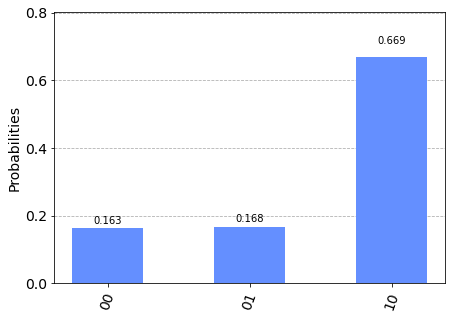

In [38]:
meas_zx = QuantumCircuit(2,2)
meas_zx.h(0)
meas_zx.measure([0,1],[0,1])
meas_zx.h(0)

print('Results for a z and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_zx)).result().get_counts()
plot_histogram(counts)

Nesse caso, descobrimos que os qubits nunca geram ambos 1. O mesmo é verdade quando Bob faz a medição `z` e Alice faz `x`.

Results for a z and an x measurement:


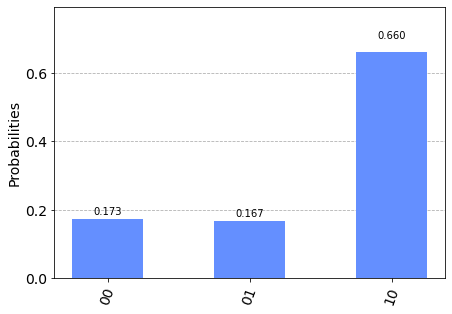

In [39]:
meas_xz = QuantumCircuit(2,2)
meas_xz.h(0)
meas_xz.measure([0,1],[0,1])
meas_xz.h(0)

print('Results for a z and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_xz)).result().get_counts()
plot_histogram(counts)

Com essas informações, Alice e Bob podem começar a especular sobre o que aconteceria se ambos realizassem uma medição `x`.

Eles podem resumir seus resultados até agora nas duas observações a seguir:

1. Se as medidas `z` forem feitas em ambos os qubits, eles nunca produzirão 0;
2. Se uma medição `x` de um qubit for 1, uma medição `z` do outro será 0 (porque o resultado 11 nunca ocorre nesses casos).

Elas correspondem exatamente às observações feitas para as formas coloridas no cenário clássico. Se aplicarmos a mesma lógica que fizemos naquele caso, podemos analisar o caso em que Alice e Bob fazem uma medição de `x`, e ambos obtêm o resultado 1. Bob seria então capaz de aplicar a observação 2 e inferir que Alice certamente teria obtido 0 se, em vez disso, tivesse feito uma medição `z`. Alice pode fazer o mesmo, inferindo que Bob teria obtido 1 se tivesse feito uma medição `z`. Então, juntos, eles concluem que, se ambos tivessem feito medições `z`, ambos teriam obtido a saída 0. Visto que a observação 1 nos mostra que tal resultado seria impossível, Alice e Bob poderiam prever que o resultado 11 nunca ocorrerá.

Então, vamos ver se eles estão certos.

Results for a z and an x measurement:


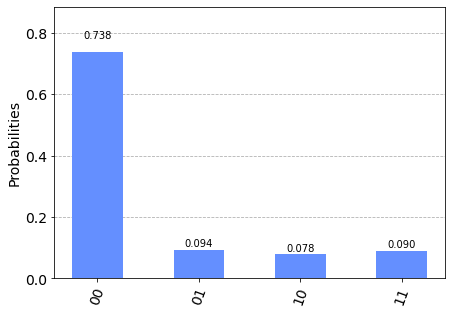

In [40]:
meas_xx = QuantumCircuit(2,2)
meas_xx.h([0,1])
meas_xx.measure([0,1],[0,1])
meas_xx.h(0)

print('Results for a z and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_xx)).result().get_counts()
plot_histogram(counts)

Errados! O resultado 11 não é provável, mas certamente não é impossível.

Os resultados dos qubits não são bem definidos antes da medição. Embora possa parecer que significa que os qubits são mais aleatórios que as variáveis clássicas, nem sempre é uma qualidade negativa. Isso também significa que as restrições aplicadas às variáveis clássicas nem sempre se aplicam aos qubits, e que as correlações quânticas podem ter propriedades que seriam impossíveis classicamente. Essas correlações exclusivas são uma das propriedades de assinatura de estados emaranhados.

---
